# Using PCA to reduce the dimensionality of the Wine Quality dataset

In this notebook, I will use PCA to reduce the dimensionality of the Wine Quality dataset. The dataset contains 11 features and a target variable. The purpose of reducing the dimensionality is to make it easier to visualize the data and to improve the performance of machine learning models. PCA is a technique that can be used to reduce the dimensionality of a dataset by transforming the data into a lower-dimensional space while preserving as much of the variance in the data as possible.

I will start by loading the dataset and exploring its structure. Then I will use PCA to reduce the dimensionality of the dataset and visualize the data in the reduced-dimensional space. 

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo  

With all the modules and libraries installed, let's start by loading the dataset and exploring its structure. For this exercise, I will use the Wine Quality dataset from the UCI Machine Learning Repository. The dataset contains 11 features and a target variable that represents the quality of the wine.

In [44]:

wine_quality = fetch_ucirepo(id=186) 
  

X = wine_quality.data.features 
y = wine_quality.data.targets 
  
print(wine_quality.metadata) 
  
print(wine_quality.variables) 

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

All the features are continuous and the target variable is integer. The target variable is a quality score that ranges from 0 to 10. The features represent various chemical properties of the wine, such as alcohol content, acidity, and sugar content. We continue standardizing the data using the numpy function mean and std, after that, we scaled data with those values.

In [45]:
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_scaled = (X - X_mean) / X_std

Now, we calculate the covariance matrix of the standardized data and then calculate the eigenvectors and eigenvalues of the covariance matrix and plot them.

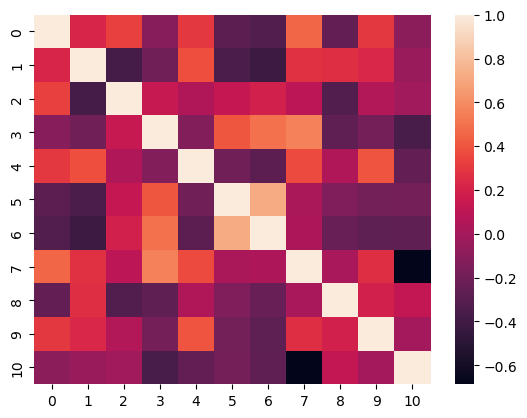

In [46]:
cov_matrix = np.cov(X_scaled, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
sns.heatmap(cov_matrix)
plt.show()


We sort the eigenvectors by their corresponding eigenvalues in descending order and then select the top k eigenvectors that correspond to the k largest eigenvalues. In this exercise, we will reduce the dimensionality of the dataset from 11 to 2 dimensions, so we will select the top 2 eigenvectors.

In [47]:

sorted_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_index]
sorted_eigenvectors = eigenvectors[:, sorted_index]

n_components = 2
eigenvector_subset = sorted_eigenvectors[:, 0:n_components]

We then use these eigenvectors to transform the data into the reduced-dimensional space. Using the dot function from numpy, we multiply the standardized data by the top k eigenvectors to obtain the reduced-dimensional data.

In [48]:
X_pca = np.dot(X_scaled, eigenvector_subset)

After that, we create a dataframe with the reduced-dimensional data and the target variable. We then visualize the data with heatmap function.

Finally, we can see that the data is now in a lower-dimensional space and is easier to visualize. This will make it easier to analyze the data and build machine learning models.

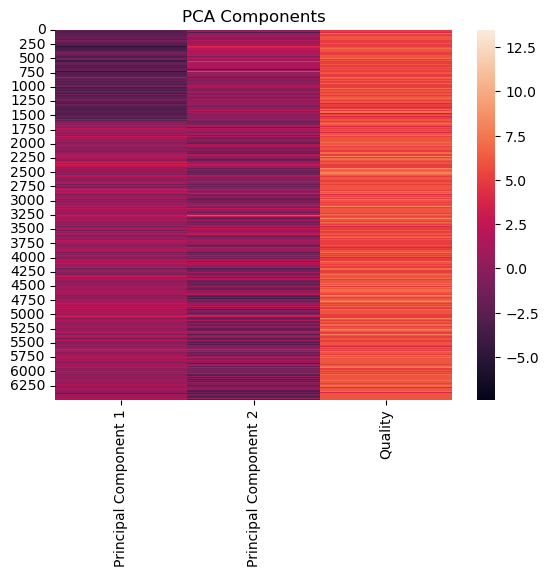

In [49]:
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Quality'] = y
sns.heatmap(pca_df)
plt.title('PCA Components')
plt.show()

Finally, we visualize the data in the reduced-dimensional space using a scatter plot. We plot the first two principal components of the data and color the points by the target variable. This allows us to see how the data is distributed in the reduced-dimensional space and how well the principal components separate the different classes.

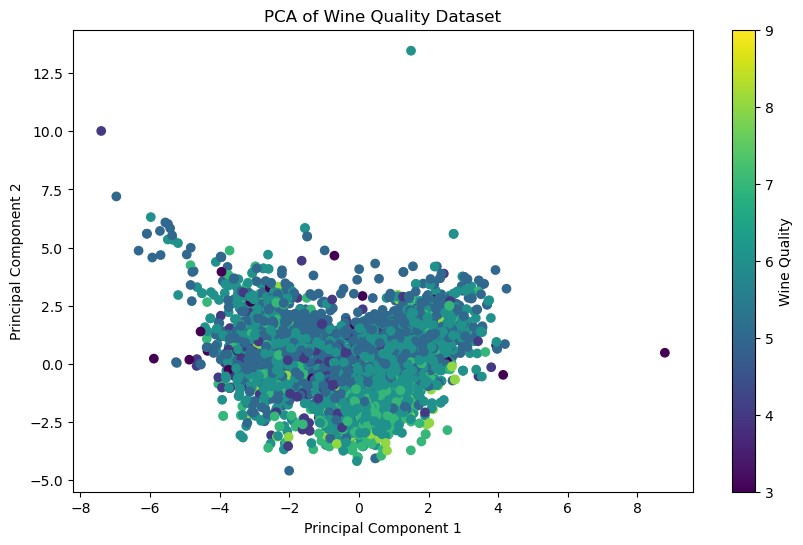

In [50]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], c=pca_df['Quality'], cmap='viridis')
plt.colorbar(scatter, label='Wine Quality')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Quality Dataset')
plt.show()

Also we obtain the variance explained by each principal component. This allows us to see how much of the variance in the data is captured by each principal component. We can see that the first principal component captures the most variance in the data, followed by the second principal component.

In [51]:
explained_variance = sorted_eigenvalues / np.sum(sorted_eigenvalues)
print(f"\nVarianza explicada por el primer componente: {explained_variance[0]:.2f}")
print(f"Varianza explicada por el segundo componente: {explained_variance[1]:.2f}")


Varianza explicada por el primer componente: 0.28
Varianza explicada por el segundo componente: 0.23
